In [24]:
import pandas as pd
from utils.utils import *
from matplotlib.ticker import PercentFormatter


%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Analysis of a few products


In [6]:
c = 0.1
alpha = 1
beta = 0.8
T = list(range(1, 13))
Delta = 1/12
S0=11112
UP = 1.0491
DOWN = round(1/UP, 4)
delta = 0.027798
r = -0.007802

In [7]:
s = 'Our parameters are:'
s+='\n  - S0 = {}'.format(S0)
s+='\n  - Ti = {}'.format(T)
s+='\n  - \u0394 = 1/{}'.format(int(1/Delta))
s+='\n  - \u03B4 = {:.4%}'.format(delta)
s+='\n  - r = {:.4%}'.format(r)
s+='\n  - c = {:.2%}'.format(c)
s+='\n  - \u03B1 = {:.2f}'.format(alpha)
s+='\n  - \u03B2 = {:.2f}'.format(beta)
print(s)

Our parameters are:
  - S0 = 11112
  - Ti = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
  - Δ = 1/12
  - δ = 2.7798%
  - r = -0.7802%
  - c = 10.00%
  - α = 1.00
  - β = 0.80


### Simple RCN and Barrrier RCN prices :

In [8]:
simple_RCN = RCN_price(initial_index_price = S0,
                       up_factor = UP, 
                       down_factor = DOWN, 
                       RCN_coupon_rate = c, 
                       RCN_alpha = alpha,
                       RCN_payment_dates = T,
                       index_dividend_yield = delta,
                       RCN_barrier = False,
                       RCN_callable = False,
                       r = r,
                       period_length = Delta)
print(f'The price of a simple RCN with maturity one year, monthly payments,',
      f'annualized coupon rate {c} and strike \u03B1 = {alpha} is:\n{simple_RCN}')

The price of a simple RCN with maturity one year, monthly payments, annualized coupon rate 0.1 and strike α = 1 is:
1.0352126301


In [9]:
barrier_RCN = RCN_price(initial_index_price = S0,
                        up_factor = UP, 
                        down_factor = DOWN, 
                        RCN_coupon_rate = c, 
                        RCN_alpha = alpha,
                        RCN_payment_dates = T,
                        index_dividend_yield = delta,
                        RCN_barrier = True,
                        RCN_callable = False,
                        r = r,
                        period_length = Delta,
                        RCN_beta = beta)
print(f'The price of a barrier RCN with maturity one year, monthly payments,',
      f'annualized coupon rate {c}, strike \u03B1 = {alpha} and barrier',
      f'\u03B2 = {beta} is:\n{barrier_RCN}')

The price of a barrier RCN with maturity one year, monthly payments, annualized coupon rate 0.1, strike α = 1 and barrier β = 0.8 is:
1.0744764017


### Par coupon rates of simple RCN and Barrier RCN

In [10]:
coupon_rates = np.linspace(0, 1, 10001)

In [11]:
def c_per_rcn_type(barrier=False):    
    error = []
    prices = []

    for c in coupon_rates: 
        price = RCN_price(initial_index_price = S0,
                          up_factor = UP, 
                          down_factor = DOWN, 
                          RCN_coupon_rate = c, 
                          RCN_alpha = alpha,
                          RCN_payment_dates = T,
                          index_dividend_yield = delta,
                          RCN_barrier = barrier,
                          RCN_callable = False,
                          r = r,
                          period_length = Delta,
                          RCN_beta = 0.8) # beta will be ignored if the barrier is false
        
        prices.append(price)
        error.append(np.abs(price - 1.00))

    return coupon_rates[np.argmin(error)], prices

In [12]:
cpn_par_simple, simple_prices = c_per_rcn_type(False)
print('The par coupon rate for the simple RCN is: {:.2%}'.format(cpn_par_simple))

The par coupon rate for the simple RCN is: 6.49%


In [13]:
cpn_par_barrier, barrier_prices = c_per_rcn_type(True)
print('The par coupon rate for the barrier (\u03B2 = 0.8) RCN is: {:.2%}'.format(cpn_par_barrier))

The par coupon rate for the barrier (β = 0.8) RCN is: 2.58%


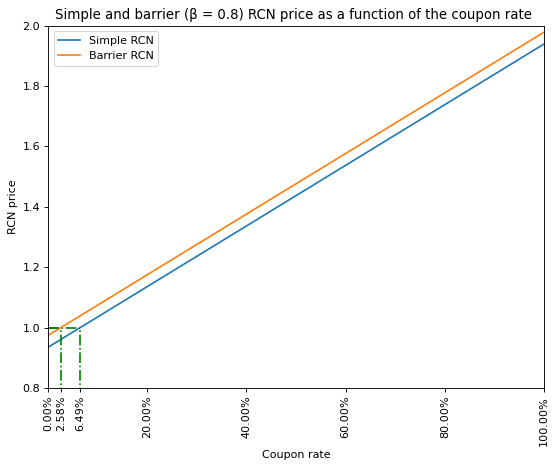

In [29]:
fig = plt.figure(figsize=(8, 6), dpi=80)

# plot simple RCN
plt.plot(coupon_rates, simple_prices, label='Simple RCN')
plt.plot([0, cpn_par_simple], [1, 1], c='g', ls='-.')
plt.plot([cpn_par_simple, cpn_par_simple], [0, 1], c='g', ls='-.')

# plot barrier RCN
plt.plot(coupon_rates, barrier_prices, label='Barrier RCN')
plt.plot([0, cpn_par_barrier], [1, 1], c='g', ls='-.')
plt.plot([cpn_par_barrier, cpn_par_barrier], [0, 1], c='g', ls='-.')

# make graph appealing
plt.xticks(list(plt.xticks()[0]) + [cpn_par_barrier, cpn_par_simple], rotation=90)
plt.title('Simple and barrier (\u03B2 = 0.8) RCN price as a function of the coupon rate ')
plt.xlabel('Coupon rate')
plt.ylabel('RCN price')
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=2))
plt.xlim([0, 1])
plt.ylim([0.8, 2])
plt.legend()
plt.show() #test 